# 1. Load the Dataset and Preprocess the Data

• Set your random seed to 42.

• Split the data into training, validation and test sets (60% , 20% , 20% ).

• As the data ranges vary significantly across the feature dimensions, you should scale your features. Scale them linearly within the 0-1 range. Be careful not to include the test data when scaling. You can use StandartScaler for that.

In [1]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset.
df_titanic = pd.read_csv("titanicdata.csv")
df_titanic

,Survived,Pclass,Sex,Age
0,0,3,2,22.000000
1,1,1,1,38.000000
2,1,3,1,26.000000
3,1,1,1,35.000000
4,0,3,2,35.000000
...,...,...,...,...
886,0,2,2,27.000000
887,1,1,1,19.000000
888,0,3,1,29.699118
889,1,1,2,26.000000


In [3]:
# Set your random seed to 42. Split the data into training, validation and test
# sets (60%, 20%, 20%).
X = df_titanic.drop("Survived", axis=1)
y = df_titanic["Survived"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4,
                                                    random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp,
                                                    test_size=0.5,
                                                    random_state=42)

In [4]:
# Split your features and labels as X and y. Scale only the features of the
# dataset.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [5]:
# Display the scaled train data.
pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train).reset_index(drop=True)],
          axis=1)

,0,1,2,Survived
0,-0.408652,0.737125,2.518697,1
1,0.803682,0.737125,-1.649218,0
2,0.803682,0.737125,0.203189,1
3,0.803682,-1.356623,-0.723015,0
4,-0.408652,-1.356623,-0.105546,1
...,...,...,...,...
529,0.803682,-1.356623,-0.645831,1
530,-1.620987,0.737125,0.025598,0
531,0.803682,0.737125,0.897841,0
532,-1.620987,-1.356623,-1.186116,1


In [6]:
# Display the scaled validation data which is scaled using fitted scaler.
pd.concat([pd.DataFrame(X_valid), pd.DataFrame(y_valid).reset_index(drop=True)],
          axis=1)

,0,1,2,Survived
0,-1.620987,-1.356623,0.025598,1
1,-1.620987,0.737125,1.245167,0
2,0.803682,0.737125,0.025598,0
3,-0.408652,-1.356623,-0.414280,1
4,-0.408652,0.737125,0.511923,0
...,...,...,...,...
173,-1.620987,-1.356623,-0.877382,1
174,-0.408652,-1.356623,0.820658,1
175,0.803682,-1.356623,-2.189503,1
176,-1.620987,0.737125,2.364330,1


In [7]:
# Display the scaled test data which is scaled using fitted scaler.
pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test).reset_index(drop=True)],
          axis=1)

,0,1,2,Survived
0,0.803682,0.737125,-0.877382,0
1,0.803682,0.737125,0.025598,0
2,0.803682,0.737125,0.859249,0
3,0.803682,-1.356623,0.126005,1
4,-0.408652,0.737125,0.203189,0
...,...,...,...,...
174,0.803682,0.737125,-0.645831,0
175,-1.620987,-1.356623,0.048821,1
176,0.803682,0.737125,1.129392,0
177,-1.620987,-1.356623,-0.645831,1


# 2. Implement the Logistic Regression Model

• Initialize the model parameters w.

• Implement the sigmoid function.

• Implement the cost function.

• Implement the gradient descent algorithm to minimize the cost function, updating the parameters
as w.

In [8]:
# Implement the sigmoid function.
def sigmoid(z):
  return 1/(1+np.exp(-z))

def cost(X, y, weights):
  m = len(y)
  linear_comb = np.dot(X, weights)
  y_predicted = sigmoid(linear_comb)
  cost = (-1/m) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
  return cost

# Implement the fit function which includes gradient descent algorithm.
def logistic_regression_fit(X_train, y_train, X_valid, y_valid, step_size,
                            iter_amount):
  sample_amount, feature_amount = X_train.shape
  train_losses = []
  valid_losses = []

  #Initialize the model parameters w.
  weights = np.zeros(feature_amount)

  # Gradient Descent Algorithm:
  for i in range(iter_amount):
    linear_comb = np.dot(X_train, weights)
    y_predicted = sigmoid(linear_comb)

    # Derivative of the cost function (dw --> gradient):
    dw = (1/sample_amount) * np.dot(X_train.T, (y_predicted - y_train))

    weights -= step_size * dw

    # Calculate the losses for training and validation data.
    train_loss = cost(X_train, y_train, weights)
    train_losses.append(train_loss)
    valid_loss = cost(X_valid, y_valid, weights)
    valid_losses.append(valid_loss)

  return (weights, train_losses, valid_losses)

# Implement the prediction algorithm.
def logistic_regression_predict(X, weights):
  linear_comb = np.dot(X, weights)
  y_predicted = sigmoid(linear_comb)
  y_predicted_label = [1 if i > 0.5 else 0 for i in y_predicted]
  return y_predicted_label

# 3. Train the Model and Plot the Losses

Set the step size to 0.1. Train your model using the training data. Calculate the loss on the validation data. Plot both the training and validation losses across 100 iterations.

In [9]:
weights, train_losses, valid_losses = logistic_regression_fit(X_train, y_train,
                                                              X_valid, y_valid,
                                                              step_size=0.1,
                                                              iter_amount=100)
y_predicted = logistic_regression_predict(X_test, weights)
accuracy = accuracy_score(y_test, y_predicted)
print("Initial Accuracy:", accuracy)

Initial Accuracy: 0.8268156424581006


In [10]:
print("The loss on the validation data:", cost(X_valid, y_valid, weights))

The loss on the validation data: 0.537520415648391


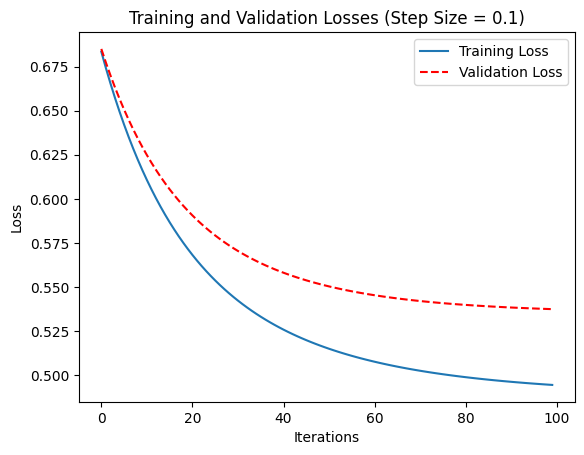

In [11]:
# Plot the losses.
plt.plot(range(100), train_losses, label='Training Loss')
plt.plot(range(100), valid_losses, color='r', linestyle='--', label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Losses (Step Size = 0.1)')
plt.legend()
plt.show()

# 4. Vary the Step Size and Number of Iterations and Pick the Best Combination

Now vary your step size and number of iterations, and calculate the validation loss in each case. Pick the one that gives you the best loss. Plot the loss curve across different iterations for the chosen values of these hyperparameters.

In [12]:
# Create different step size and iteration values for try different
step_sizes = [0.001, 0.01, 0.5, 1]
iterations = [10, 100, 1000, 3000]

# Create a losses dictionary in which the keys are (step_size, iter_amount)
# tuples.
losses_dict = {}

for step_size in step_sizes:
  for iter_amount in iterations:
    weights, train_losses, valid_losses = logistic_regression_fit(X_train,
                                                                  y_train,
                                                                  X_valid,
                                                                  y_valid,
                                                                  step_size,
                                                                  iter_amount)
    losses_dict[(step_size, iter_amount)] = cost(X_valid, y_valid, weights)

# Sort the losses dictionary in the increasing order to have the hyperparameter
# values with the least validation loss value at the 0th index.
losses_dict = dict(sorted(losses_dict.items(), key=lambda item: item[1]))

losses_dict

{(0.5, 1000): 0.534634704544494,
 (0.5, 3000): 0.534634704544494,
 (1, 1000): 0.5346347045444941,
 (1, 3000): 0.5346347045444941,
 (1, 100): 0.5346353736685395,
 (0.5, 100): 0.5347181480969195,
 (0.01, 3000): 0.5349937671266906,
 (1, 10): 0.5369883528918146,
 (0.01, 1000): 0.5375816684373105,
 (0.5, 10): 0.5495527498242708,
 (0.001, 3000): 0.5726708547460261,
 (0.01, 100): 0.6300067495652006,
 (0.001, 1000): 0.630063837057631,
 (0.01, 10): 0.6850824713265181,
 (0.001, 100): 0.6850921913805648,
 (0.001, 10): 0.6923206407766386}

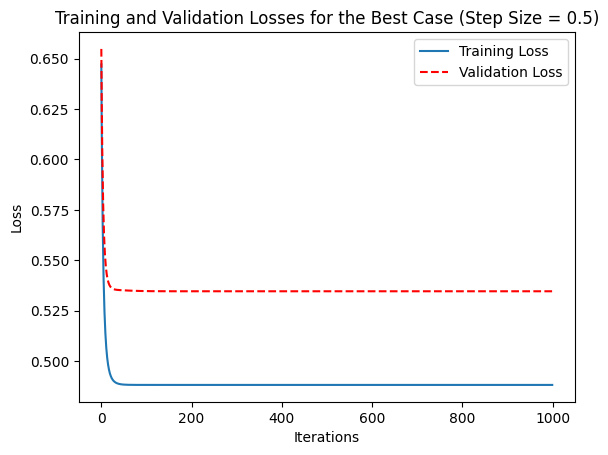

In [13]:
# Select the hyperparameter values with the least validation loss value.
step_size = list(losses_dict.items())[0][0][0]
iter_amount = list(losses_dict.items())[0][0][1]
weights, train_losses, valid_losses = logistic_regression_fit(X_train,
                                                                  y_train,
                                                                  X_valid,
                                                                  y_valid,
                                                                  step_size,
                                                                  iter_amount)
# Plot the losses for the new better hyperparameter values.
plt.plot(range(iter_amount), train_losses, label='Training Loss')
plt.plot(range(iter_amount), valid_losses, color='r', linestyle='--', label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Losses for the Best Case (Step Size = 0.5)')
plt.legend()
plt.show()

# 5. Retrain the Final Model

Combine the validation and training data and retrain the final model with the chosen hyperparameters.

In [14]:
# Combine the validation and training data.
X_train = np.concatenate((X_train, X_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

In [15]:
# Retrain the final model with the chosen hyperparameters.
hyperparams = list(losses_dict.items())[0][0]
step_size = hyperparams[0]
iter_amount = hyperparams[1]
weights, train_losses, test_losses = logistic_regression_fit(X_train, y_train,
                                                             X_test, y_test,
                                                             step_size,
                                                             iter_amount)

# 6. Evaluate the Accuracy of the Model

Evaluate the accuracy of your model on the testing data and report the results.

In [16]:
# Print the final accuracy.
y_predicted = logistic_regression_predict(X_test, weights)
accuracy = accuracy_score(y_test, y_predicted)
print("Final Accuracy:", accuracy)

Final Accuracy: 0.8324022346368715


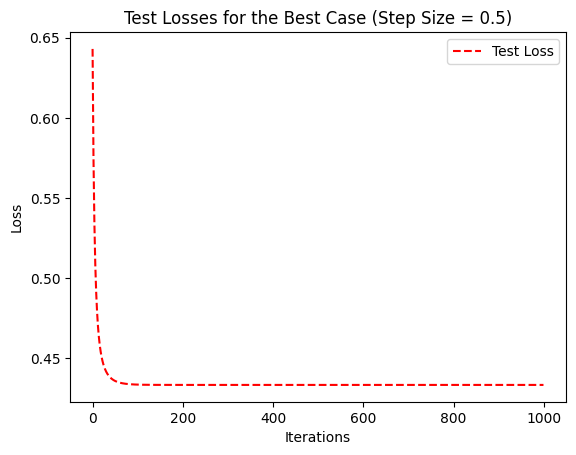

In [17]:
# Plot the test losses for the final hyperparameter values.
plt.plot(range(iter_amount), test_losses, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Test Losses for the Best Case (Step Size = 0.5)')
plt.legend()
plt.show()

In [18]:
# Print the test loss value.
print("The test loss value:", cost(X_test, y_test, weights))

The test loss value: 0.43347968295264283
